In [39]:
import warnings
import pandas as pd
from datetime import datetime
from datetime import date
import sqlalchemy as sql
from pathlib import Path
warnings.filterwarnings('ignore')  # Hide warnings
#Library - Project3 
import CryptoDownloadData as coinData
import CryptoPerfSummary as coinAnalytic
import EfficientFrontierCalculator as ef
import get_index_data as gp
import matplotlib.pyplot as plt
#from st_aggrid import AgGrid
#DataBase Tables
# Database connection string
crypto_data_connection_string = 'sqlite:///./Reference/crypto.db'
# Database engine
crypto_data_engine = sql.create_engine(crypto_data_connection_string, echo=True)
'COINBASE_100' #CoinList - symbols
'ETF_LIST' #Sample ETF
'CRYPTO_PX_HISTORY' #Crypto PX History

# If need to repopulate database sqllite, please set refresh = True
refresh = False

In [40]:
# Download all price history for Coin List 100 into CRYPTO_PX_HISTORY
# If need to rerun, please change refresh = True
if refresh == True:
    coinData.create_coinlist100
    coinData.create_sampleETF
    coinData.drop_table('CRYPTO_PX_HISTORY')
    start_date = datetime(2015, 1, 1)
    end_date = datetime.today()
    coinData.download_px_data_from_COINBASE_100(start_date, end_date)

In [41]:
farmdex_portfolio = ['CAKE', 'AAVE', 'CRV', 'RLY', 'SNX', 'SUSHI', 'RGT', 'REEF']
farmdex_prices = pd.DataFrame()

for i in farmdex_portfolio:
    prices_df = coinData.get_px_history(i)
    prices_list = prices_df['adjClose'].values.tolist()
    farmdex_prices.insert(0, i, prices_list[0:365], True)

In [42]:
optimal_weights = ef.calculate_efficient_frontier(farmdex_prices)

In [23]:
portfolio_weights_df = pd.DataFrame({'Coins' : farmdex_portfolio, 'Weights' : optimal_weights})
portfolio_weights_df

,Coins,Weights
0,CAKE,0.248984
1,AAVE,0.006803
2,CRV,0.111608
3,RLY,0.068067
4,SNX,0.013777
5,SUSHI,0.091868
6,RGT,0.247073
7,REEF,0.211820


In [24]:
# if you want to set date range add start and end dates
# e.g. px_history_df = coinData.get_pxhist_by_etfname('Metadex', 'adjClose', '2017-11-11', '2017-11-13')
YieldFarming_df = coinData.get_pxhist_by_etfname('Farmdex', 'adjClose')
YieldFarming_df.drop(columns = ['symbol'], inplace=True)
display(YieldFarming_df)

yieldfarm = gp.get_index_prices('YieldFarmingTokens')

coinbase100_df = coinData.get_pxhist_by_etfname('Ventidex', 'adjClose')
display(coinbase100_df)

metaverse_df = coinData.get_pxhist_by_etfname('Metadex', 'adjClose')
display(metaverse_df)

,adjClose
date,
2020-09-29,1.117862
2020-09-30,0.436443
2020-10-01,0.415366
2020-10-02,0.506049
2020-10-03,0.666428
...,...
2022-02-20,0.010077
2022-02-21,0.009390
2022-02-22,0.009908


,symbol,adjClose
date,,
2015-01-01,BTC,314.248993
2015-01-02,BTC,315.032013
2015-01-03,BTC,281.082001
2015-01-04,BTC,264.195007
2015-01-05,BTC,274.473999
...,...,...
2022-02-03,DOT,18.812508
2022-02-04,DOT,20.424664
2022-02-05,DOT,21.366989


,symbol,adjClose
date,,
2017-11-09,MANA,0.015130
2017-11-10,MANA,0.012940
2017-11-11,MANA,0.011979
2017-11-12,MANA,0.010505
2017-11-13,MANA,0.011330
...,...,...
2022-02-20,ALICE,7.095815
2022-02-21,ALICE,6.443939
2022-02-22,ALICE,6.810020


In [44]:
from EfficientFrontierCalculator import calculate_efficient_frontier

yieldfarmingtokens_weights = calculate_efficient_frontier(YieldFarming_df)
display(yieldfarmingtokens_weights)

yield_2 = calculate_efficient_frontier(yieldfarm)
display(yield_2)


#coinbase100_weights = calculate_efficient_frontier(coinbase100_df)
#display(coinbase100_weights)

#metaverse_weights = calculate_efficient_frontier(metaverse_df)
#display(metaverse_weights)

array([1.])

array([0.19598467, 0.06083362, 0.09927251, 0.02118761, 0.05618693,
       0.11925756, 0.25284427, 0.19443283])

In [16]:
farm_weights = calculate_efficient_frontier(yieldfarm)
display(yield_2)

coinbase_df = gp.get_index_prices('Coinbase100')
coinbase_weights = calculate_efficient_frontier(coinbase100_df)
display(coinbase100_weights)


meta_df = gp.get_index_prices('TopMetaverseTokens')
coinbase_weights = calculate_efficient_frontier(coinbase100_df)
display(coinbase100_weights)



array([0.25876044, 0.01009918, 0.1045522 , 0.00771242, 0.05312929,
       0.07766648, 0.2478748 , 0.24020519])

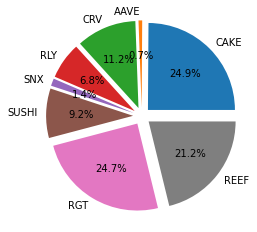

In [36]:
explode = [.1, .1, .1, .1, .1, .1, .1, .1]

fig1, ax1 = plt.subplots()
ax1.pie(optimal_weights, explode = explode,labels = farmdex_portfolio, autopct='%1.1f%%')

plt.show()

In [38]:
plt.savefig('farmdexPIE.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
# Pull Price by Name        
px_history_df = coinData.get_px_history('ETH')
display(px_history_df.head())
display(px_history_df.tail())

In [ ]:
# Get Price History Marix by Period - Sharpe and 30d roll beta, annual return
t_date = datetime(2022, 2, 21)
px_matrix = coinAnalytic.get_crypto_hist_martix_summary(t_date)
display(px_matrix.dropna().head())

In [ ]:
#Get SMA, HIGH, LOW, RS RATING
t_date = datetime(2022, 2, 21)
px_strat = coinAnalytic.get_crypto_px_strat(t_date)
display(px_strat)


In [ ]:
#Our 3 ETF Sample - 
#file_path = Path('./Reference/sampleETF.csv')
#coinData.create_index_from_csv(file_path, 'ETF_LIST')
#coinData.create_sampleETF
#Coinbase100  -- Ventidex
#TopMetaverseTokens -- Metadex
#YieldFarmingCoins -- Farmdex
#coinData.create_sampleETF

def get_symbollist_by_index(etf_name = None):
    if etf_name is not None:
        sql_query = f"""
        SELECT DISTINCT symbol FROM ETF_LIST WHERE ETF = '{etf_name}' """
    else:
        sql_query = f"""
        SELECT DISTINCT symbol FROM ETF_LIST"""
    
    etf_list= pd.read_sql_query(sql_query, crypto_data_connection_string)
    symbol_list = coinData.get_where_condition(etf_list, 'symbol')
    return symbol_list

def get_pxhist_by_symbol_list(symbol_list, column_name = None, start_date = None, end_date = None):
    
    if column_name is not None:
        select = f"date, symbol, {column_name}"
    else:
        select = '*'
    
    
    if start_date is not None and end_date is not None:
        sql_query  = f"SELECT DISTINCT {select} FROM CRYPTO_PX_HISTORY WHERE symbol in ({symbol_list}) and (date >='{start_date}' and date <= '{end_date}')"
    elif start_date is not None:
        sql_query  = f"SELECT DISTINCT {select} FROM CRYPTO_PX_HISTORY WHERE symbol in ({symbol_list}) and date >='{start_date}'"
    elif end_date is not None:
        sql_query  = f"SELECT DISTINCT {select} FROM CRYPTO_PX_HISTORY WHERE symbol in ({symbol_list}) and date <='{end_date}'"
    else:
        sql_query  = f"SELECT DISTINCT {select} FROM CRYPTO_PX_HISTORY WHERE symbol in ({symbol_list})"
    
    px_history_df = pd.read_sql_query(sql_query, crypto_data_connection_string)
    if 'index' in px_history_df.columns:
        px_history_df = px_history_df.drop(['index'], axis = 1)
    px_history_df = px_history_df.set_index('date')
    
    return px_history_df
    
def get_pxhist_by_etfname(etf_name = None, column_name = None, start_date = None, end_date = None):
    symbol_list = get_symbollist_by_index(etf_name)
    px_history_df = get_px_hist_by_symbol_list(symbol_list, column_name, start_date, end_date)
    return px_history_df
    
    
    
    #etf_summary = etf_list.merge(px_strat, left_on='symbol', right_on='symbol').groupby(['ETF','symbol']).mean().sort_values(by=['ETF','rank'])
#etf_summary 
#etf_list

In [4]:
px_history_df = coinData.get_pxhist_by_etfname('Ventidex')
px_history_df = coinData.get_pxhist_by_etfname('Metadex')
px_history_df = coinData.get_pxhist_by_etfname('Metadex', 'adjClose')
px_history_df = coinData.get_pxhist_by_etfname('Metadex', 'adjClose', '2017-11-11', '2017-11-13')
#px_history_df = get_pxhist_by_etfname('Metadex', 'adjClose')
px_history_df
# = get_px_hist_by_symbol_list(symbol_list, 'adjClose', '2017-11-11')

,symbol,adjClose
date,,
2017-11-11,MANA,0.011979
2017-11-12,MANA,0.010505
2017-11-13,MANA,0.011330
2017-11-11,ENJ,0.019978
2017-11-12,ENJ,0.018245
2017-11-13,ENJ,0.023990


In [ ]:





sql_query = f"""
SELECT DISTINCT date, adjClose FROM CRYPTO_PX_HISTORY WHERE symbol='BTC' and date > '2015-01-03'
"""
px_history_df = pd.read_sql_query(sql_query, crypto_data_connection_string)
#px_history_df = px_history_df.drop(['index'], axis = 1)
px_history_df = px_history_df.set_index('date')
px_history_df


In [ ]:
#3 Portfolios - Return analysis 
perf_summary = etf_list.merge(px_matrix, left_on='symbol', right_on='symbol').groupby(['ETF','symbol']).mean().sort_values(by=['ETF','rank'])
perf_summary 

In [ ]:
AgGrid(perf_summary)